<h1 style="font-size:30px;">Thresholding</h1>

One of the most important and fundamental operations in computer visions pipelines is image thresholding. It is often used to create binary images that can then be used for follow-on processing tasks. In this notebook you will learn how to use two types of thresholding techniques. 

* Global thresholding
* Adaptive thresholding

![Thresholding](https://opencv.org/wp-content/uploads/2021/08/c0-m2-feature-image-02.png)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/f8ae3j0nbrflife/AAAy-WwcREtWOGgoEbFLDPANa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

# 1. Global Thresholding
<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Binary images are used extensively in computer vision applications, as they allow you to selectively process specific regions of an image, keeping the other regions intact. Image thresholding is used to create binary images from grayscale images. You can use different thresholds to create different binary images from the same original image using the **`threshold()`** function.

### <font color="green">Function Syntax </font>

``` python
retval, dst = cv2.threshold(src, thresh, maxval, type[, dst])
```

`dst`: The output array of the same size and type and the same number of channels as `src`.

The function has **4 required arguments**:

1. `src`: input array (multiple-channel, 8-bit or 32-bit floating point).
2. `thresh`: threshold value.
3. `maxval`: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
4. `type`: thresholding type (see ThresholdTypes).


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`threshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)
[**`threshold tutorial`**](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Lane detection example</font>

Text(0.5, 1.0, 'Thresholded')

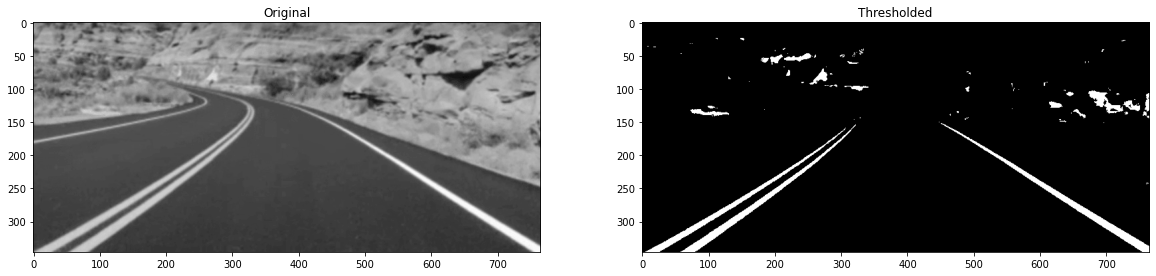

In [2]:
# Read image in grayscale.
img = cv2.imread('road_lanes.png', cv2.IMREAD_GRAYSCALE)

# Perform binary thresholding.
retval, img_thresh = cv2.threshold(img, 165, 255, cv2.THRESH_BINARY)

# Display the images.
plt.figure(figsize = [20, 8])
plt.subplot(121); plt.imshow(img); plt.title('Original')
plt.subplot(122); plt.imshow(img_thresh); plt.title('Thresholded')

# 2. Adaptive Thresholding
Suppose you wanted to build an application that could read (decode) sheet music. This is similar to 
Optical Character Recognition (OCR) for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding 
techniques. Let's take a look at an example.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>

``` python
dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
```

`dst`	Destination image of the same size and the same type as src.

The function has **6 required arguments**:
1. `src`:	Source 8-bit single-channel image.

2. `maxValue`:	Non-zero value assigned to the pixels for which the condition is satisfied
3. `adaptiveMethod`:	Adaptive thresholding algorithm to use, see AdaptiveThresholdTypes. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boundaries.
4. `thresholdType:`	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV, see ThresholdTypes.
5. `blockSize`:	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
6. `C`:	Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`adaptiveThreshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)
[**`threshold tutorial`**](https://docs.opencv.org/4.5.2/d7/d4d/tutorial_py_thresholding.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Sheet music reader</font>

Text(0.5, 1.0, 'Thresholded (adaptive)')

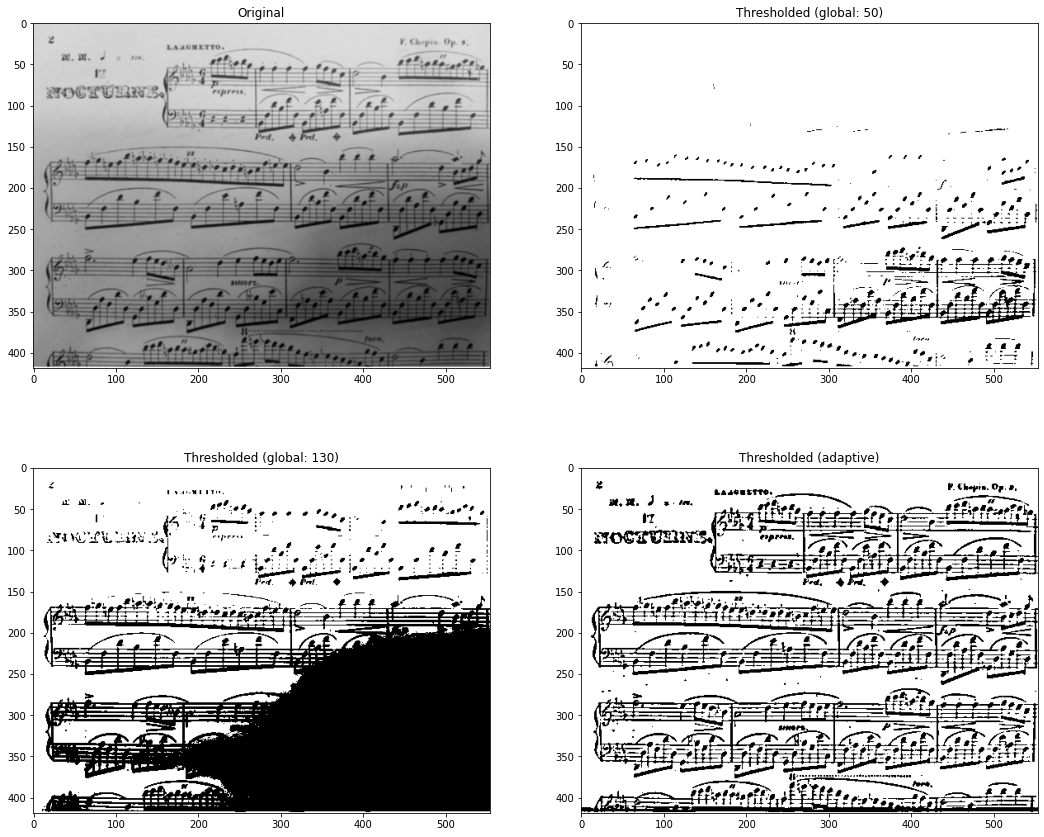

In [3]:
# Read the original image.
img = cv2.imread('Piano_Sheet_Music.png', cv2.IMREAD_GRAYSCALE)

# Perform global thresholding.
retval, img_thresh_gbl_1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding.
retval, img_thresh_gbl_2 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding.
img_thresh_adp = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)

# Display the images.
plt.figure(figsize = [18, 15])
plt.subplot(221); plt.imshow(img);              plt.title('Original')
plt.subplot(222); plt.imshow(img_thresh_gbl_1); plt.title('Thresholded (global: 50)')
plt.subplot(223); plt.imshow(img_thresh_gbl_2); plt.title('Thresholded (global: 130)')
plt.subplot(224); plt.imshow(img_thresh_adp);   plt.title('Thresholded (adaptive)')

# 3. Exercise
Please complete the code in the cell below.

In [4]:
img = cv2.imread('Sheet_Music_Test-1.jpg', cv2.IMREAD_GRAYSCALE)

# Perform global thresholding (find the best global threshold that isolates the music from the shadows).
# Use a threshold type of: cv2.THRESH_BINARY_INV
# YOUR CODE HERE
# retval, img_thresh = 

# Display the images.
# UNCOMMENT the lines below.
# plt.figure(figsize = [18,15])
# plt.subplot(121); plt.imshow(img);        plt.title('Original')
# plt.subplot(122); plt.imshow(img_thresh); plt.title('Thresholded (global)')

Your results should look similar to these.

![Music-Sheet_Thresholded](https://opencv.org/wp-content/uploads/2021/08/c0-m2-Exercise-02.png)